#IMPORTING LIBRARIES AND DATASET

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/TASK-1/copyofTask1.csv')

#DATA CLEANING

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0                                10000 non-null  int64  
 1   Id                           10000 non-null  int64  
 2   Location                     10000 non-null  int64  
 3   Area                         10000 non-null  int64  
 4   Region                       10000 non-null  int64  
 5   Number_of_Rooms              10000 non-null  int64  
 6   House_Type                   10000 non-null  object 
 7   House_Price                  10000 non-null  int64  
 8   isSold                       10000 non-null  int64  
 9   Sold_Date                    10000 non-null  object 
 10  Distance_from_City_inMiles   10000 non-null  float64
 11  Seller                       10000 non-null  int64  
 12  PostalCode                   10000 non-null  int64  
 13  Number_of_Bedroom

In [ ]:
data.fillna({"Year_Built":data['Year_Built'].mean()},inplace=True)

In [ ]:
data.isna().sum()

                                  0
Id                                0
Location                          0
Area                              0
Region                            0
Number_of_Rooms                   0
House_Type                        0
House_Price                       0
isSold                            0
Sold_Date                         0
Distance_from_City_inMiles        0
Seller                            0
PostalCode                        0
Number_of_Bedrooms                0
Number_of_Bathrooms               0
Number_of_CarParkings            46
_of_Land_inMeters                 0
Height_of_Building_inMeters    4780
Year_Built                        0
Lattitude                         0
Longtitude                        0
dtype: int64

In [ ]:
data.fillna({"Height_of_Building_inMeters":data['Height_of_Building_inMeters'].mean()},inplace=True)

In [ ]:
data.fillna({"Number_of_CarParkings":data['Number_of_CarParkings'].mean()},inplace=True)

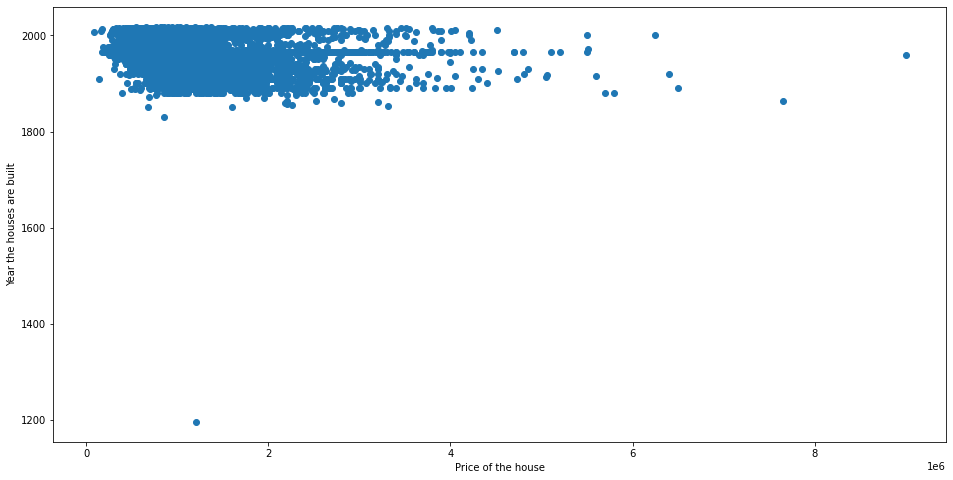

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['House_Price'], data['Year_Built'])
ax.set_xlabel('Price of the house')
ax.set_ylabel('Year the houses are built')
plt.show()

In [ ]:
cor_matrix = data.corr().abs()

In [ ]:
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

<ipython-input-129-0cb03552b6b1>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [ ]:
 to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

In [ ]:
 df1 = data.drop(data.columns[to_drop], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0                                10000 non-null  int64  
 1   Id                           10000 non-null  int64  
 2   Location                     10000 non-null  int64  
 3   Area                         10000 non-null  int64  
 4   Region                       10000 non-null  int64  
 5   Number_of_Rooms              10000 non-null  int64  
 6   House_Type                   10000 non-null  object 
 7   House_Price                  10000 non-null  int64  
 8   isSold                       10000 non-null  int64  
 9   Sold_Date                    10000 non-null  object 
 10  Distance_from_City_inMiles   10000 non-null  float64
 11  Seller                       10000 non-null  int64  
 12  PostalCode                   10000 non-null  int64  
 13  Number_of_Bedroom

In [ ]:
data.drop('House_Type',axis=1,inplace=True)

In [ ]:
data.drop('Sold_Date',axis=1,inplace=True)

In [ ]:
num_feats = data[['Year_Built', 'House_Price','Number_of_Rooms','Distance_from_City_inMiles']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_scaled = scaler.fit_transform(num_feats)
num_scaled[:5]

array([[0.86861314, 0.23331464, 0.33333333, 0.16913319],
       [0.85644769, 0.08188446, 0.11111111, 0.13953488],
       [0.93511579, 0.05888951, 0.22222222, 0.22198732],
       [0.97810219, 0.13011778, 0.22222222, 0.09513742],
       [0.93511579, 0.12058329, 0.22222222, 0.17970402]])

In [ ]:
num_scaled_df = pd.DataFrame(num_scaled, columns=num_feats.columns)
num_scaled_df.head()

,Year_Built,House_Price,Number_of_Rooms,Distance_from_City_inMiles
0,0.868613,0.233315,0.333333,0.169133
1,0.856448,0.081884,0.111111,0.139535
2,0.935116,0.058890,0.222222,0.221987
3,0.978102,0.130118,0.222222,0.095137
4,0.935116,0.120583,0.222222,0.179704


In [ ]:
data.groupby(['Id']).count()

,,Location,Area,Region,Number_of_Rooms,House_Price,isSold,Distance_from_City_inMiles,Seller,PostalCode,Number_of_Bedrooms,Number_of_Bathrooms,Number_of_CarParkings,_of_Land_inMeters,Height_of_Building_inMeters,Year_Built,Lattitude,Longtitude
Id,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13573,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
13574,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
13575,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
data.describe()

,,Id,Location,Area,Region,Number_of_Rooms,House_Price,isSold,Distance_from_City_inMiles,Seller,PostalCode,Number_of_Bedrooms,Number_of_Bathrooms,Number_of_CarParkings,_of_Land_inMeters,Height_of_Building_inMeters,Year_Built,Lattitude,Longtitude
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,6829.733700,84.866800,10.745500,2.418400,2.936800,1.073682e+06,0.663000,10.132670,30.708500,58.780400,2.913700,1.527800,1.609303,572.36270,145.639288,1964.665178,-37.808678,144.995462
std,2886.89568,3924.003672,62.727676,6.806509,1.191505,0.956084,6.360140e+05,0.472709,5.834081,38.611239,38.745693,0.964129,0.686349,0.957940,4605.05761,97.510931,29.376081,0.078656,0.104433
min,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,8.500000e+04,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1196.000000,-38.174880,144.431810
25%,2499.75000,3430.500000,38.000000,5.000000,1.000000,2.000000,6.500000e+05,0.000000,6.200000,4.000000,31.000000,2.000000,1.000000,1.000000,176.00000,123.000000,1960.000000,-37.856300,144.929200
50%,4999.50000,6864.500000,77.000000,10.000000,2.000000,3.000000,9.020000e+05,1.000000,9.200000,19.000000,54.000000,3.000000,1.000000,2.000000,435.00000,145.639288,1964.665178,-37.802000,144.999900
75%,7499.25000,10230.250000,109.000000,15.000000,3.000000,3.000000,1.330000e+06,1.000000,13.000000,43.000000,77.000000,3.000000,2.000000,2.000000,651.00000,145.639288,1975.000000,-37.755988,145.059500
max,9999.00000,13579.000000,314.000000,34.000000,8.000000,10.000000,9.000000e+06,1.000000,47.300000,268.000000,198.000000,20.000000,8.000000,10.000000,433014.00000,6791.000000,2018.000000,-37.483810,145.526350


#Spliting of data

In [ ]:
y=data['House_Price']
y.shape

(10000,)

In [ ]:
X=data.drop(['Id','Location','Region','PostalCode','Lattitude','Longtitude','Height_of_Building_inMeters','Number_of_Bedrooms','Number_of_Bathrooms'],axis=1)
X.shape

(10000, 10)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=69,test_size=0.2)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

#MODELLING

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#model=RandomForestClassifier()

In [ ]:
 from sklearn.tree import DecisionTreeClassifier
 model=DecisionTreeClassifier()#Decision Tree Model

In [ ]:
#from sklearn.neighbors import KNeighborsClassifier
#model=KNeighborsClassifier()#K-Nearest Neighbour Model

#Training the model

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

#Predicting

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       85000       0.00      0.00      0.00         1
      145000       0.00      0.00      0.00         0
      160000       0.00      0.00      0.00         1
      170000       0.00      0.00      0.00         0
      210000       1.00      1.00      1.00         1
      215000       0.00      0.00      0.00         0
      216000       0.00      0.00      0.00         0
      227000       0.00      0.00      0.00         0
      230000       0.00      0.00      0.00         1
      240000       0.00      0.00      0.00         3
      245000       0.00      0.00      0.00         1
      247500       0.00      0.00      0.00         0
      260000       1.00      0.50      0.67         2
      263100       0.00      0.00      0.00         0
      270000       0.50      1.00      0.67         1
      272500       0.00      0.00      0.00         1
      275000       1.00      1.00      1.00         1
      275500       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1